In [1]:
import pandas as pd
from category_encoders import TargetEncoder

# ============================
# 1. Load cleaned datasets
# ============================
train_df = pd.read_csv("/workspaces/MLOps---House-prediction-E2E-Project-/Regression_ML_EndtoEnd/data/raw/processed/cleaning_train.csv")
eval_df = pd.read_csv("/workspaces/MLOps---House-prediction-E2E-Project-/Regression_ML_EndtoEnd/data/raw/processed/cleaning_eval.csv")
holdout_df = pd.read_csv("/workspaces/MLOps---House-prediction-E2E-Project-/Regression_ML_EndtoEnd/data/raw/holdout.csv")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

print("Train date range:", train_df["date"].min(), "to", train_df["date"].max())
print("Eval date range:", eval_df["date"].min(), "to", eval_df["date"].max())
print("Holdout date range:", holdout_df["date"].min(), "to", holdout_df["date"].max())

# Ensure datetime
train_df["date"] = pd.to_datetime(train_df["date"])
eval_df["date"] = pd.to_datetime(eval_df["date"])
holdout_df["date"] = pd.to_datetime(holdout_df["date"])

Train date range: 2012-03-31 to 2019-12-31
Eval date range: 2020-01-31 to 2021-12-31
Holdout date range: 2022-01-31 to 2023-12-31


In [2]:
# ============================
# Check and remove missing values in target column
# ============================
print("Missing values before cleaning:")
print(f"Train - price NaN count: {train_df['price'].isna().sum()}")
print(f"Eval - price NaN count: {eval_df['price'].isna().sum()}")
print(f"Holdout - price NaN count: {holdout_df['price'].isna().sum()}")

# Remove rows with missing price values
train_df = train_df.dropna(subset=['price'])
eval_df = eval_df.dropna(subset=['price'])
holdout_df = holdout_df.dropna(subset=['price'])

print("\nAfter removing NaN in price:")
print(f"Train shape: {train_df.shape}")
print(f"Eval shape: {eval_df.shape}")
print(f"Holdout shape: {holdout_df.shape}")

Missing values before cleaning:
Train - price NaN count: 1
Eval - price NaN count: 0
Holdout - price NaN count: 0

After removing NaN in price:
Train shape: (213238, 41)
Eval shape: (54647, 41)
Holdout shape: (54960, 39)


In [3]:
train_df.head(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002.0,2012.0,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,NaN,NaN
1,2012-03-31,57250.0,161700.0,41.606105,61.887391,6.0,7.0,2.0,14.0,218.0,0.815475,0.166667,0.000000,DAL,75423.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3077.0,35.6,21900.0,3077.0,1235.0,783.0,93600.0,1497.0,190.0,2949.0,2949.0,1152.0,109809.176444,Dallas-Fort Worth-Arlington,NaN,NaN


In [4]:
# ============================
# 2. Date Features
# ============================
def add_date_features(df):
    df["year"] = df["date"].dt.year
    df["quarter"] = df["date"].dt.quarter
    df["month"] = df["date"].dt.month

    # Reorder columns
    df.insert(1, "year", df.pop("year"))
    df.insert(2, "quarter", df.pop("quarter"))
    df.insert(3, "month", df.pop("month"))
    return df

train_df = add_date_features(train_df)
eval_df = add_date_features(eval_df)
holdout_df = add_date_features(holdout_df)

In [5]:
print(train_df.shape)
train_df.head(1)

(213238, 43)


,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,2012,1,3,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002.0,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,NaN,NaN


In [6]:
print(eval_df.shape)
eval_df.head(1)

(54647, 43)


,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2020-01-31,2020,1,1,267500.0,559900.0,279.769878,396.374376,4.0,12.0,8.0,36.0,132.5,0.947332,0.0,0.0,DET,48226.0,26.0,4.0,17.0,1.0,210.0,219.0,118.0,18.0,21.0,7150.0,32.2,55090.0,5948.0,5117.0,1380.0,256300.0,4470.0,65.0,7060.0,7060.0,4159.0,329227.535547,Detroit-Warren-Dearborn,NaN,NaN


In [7]:
print(holdout_df.shape)
holdout_df.head(1)

(54960, 41)


,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2022-01-31,2022,1,1,213000.0,229900.0,125.0,134.189032,61.0,57.0,37.0,14.0,18.5,0.991341,0.327869,0.385965,CHI,46319.0,3.0,0.0,0.0,0.0,52.0,11.0,33.0,0.0,7.0,18012.0,37.7,33912.0,18012.0,7791.0,977.0,151900.0,10557.0,487.0,17336.0,17336.0,9498.0,203402.952433,Chicago-Naperville-Elgin


The key rule:

- Fit encoders/transformers on train only

- Apply the learned mappings to eval

🎯 Why this matters

- If we had fit the encoders/scalers on both train + eval together:

- Eval would leak information into training.

- Our metrics would look artificially good, because the model would unknowingly benefit from seeing the future.

By strictly fitting on train and applying to eval:

- Eval stays a true proxy for unseen future data.

- The performance you see is realistic for when you deploy the model in the wild.

In [8]:
train_df.head()

,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,2012,1,3,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002.0,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,NaN,NaN
1,2012-03-31,2012,1,3,57250.0,161700.0,41.606105,61.887391,6.0,7.0,2.0,14.0,218.0,0.815475,0.166667,0.000000,DAL,75423.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3077.0,35.6,21900.0,3077.0,1235.0,783.0,93600.0,1497.0,190.0,2949.0,2949.0,1152.0,109809.176444,Dallas-Fort Worth-Arlington,NaN,NaN
2,2012-03-31,2012,1,3,185000.0,218500.0,66.939891,84.806231,122.0,219.0,293.0,416.0,92.0,0.967185,0.221311,0.077626,ATL,30115.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,0.0,1.0,36851.0,35.5,30608.0,36536.0,13311.0,976.0,230700.0,19240.0,1059.0,35151.0,35151.0,15846.0,193080.180695,Atlanta-Sandy Springs-Roswell,NaN,NaN
3,2012-03-31,2012,1,3,52500.0,78000.0,34.749393,63.082281,2.0,4.0,11.0,17.0,133.0,0.915875,0.000000,0.250000,DAL,75422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2533.0,48.6,27649.0,2531.0,1185.0,630.0,95300.0,1352.0,60.0,2494.0,2494.0,1168.0,120400.723344,Dallas-Fort Worth-Arlington,NaN,NaN
4,2012-03-31,2012,1,3,127450.0,129900.0,68.270723,66.610805,60.0,76.0,98.0,109.0,65.5,0.943483,0.083333,0.210526,DAL,75409.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,11495.0,34.3,23885.0,11439.0,3958.0,955.0,125900.0,5767.0,293.0,10840.0,10840.0,5194.0,139611.603433,Dallas-Fort Worth-Arlington,NaN,NaN


In [9]:
# ============================
# 3. Frequency Encoding (zipcode)
# ============================
zip_counts = train_df["zipcode"].value_counts()

train_df["zipcode_freq"] = train_df["zipcode"].map(zip_counts)
eval_df["zipcode_freq"] = eval_df["zipcode"].map(zip_counts).fillna(0)
holdout_df["zipcode_freq"] = holdout_df["zipcode"].map(zip_counts).fillna(0)

print("Zip freq example (train):")
print(train_df[["zipcode", "zipcode_freq"]].head())


'''
🔍 Nuance:

- On train, we build the frequency dictionary (zip_counts).
- On eval, we never compute new counts → we only look up in the dictionary.
- If eval has an unseen zipcode, it gets NaN, which we replace with 0.
'''

Zip freq example (train):
   zipcode  zipcode_freq
0  30002.0            94
1  75423.0            94
2  30115.0            94
3  75422.0            94
4  75409.0            94


'\n🔍 Nuance:\n\n- On train, we build the frequency dictionary (zip_counts).\n- On eval, we never compute new counts → we only look up in the dictionary.\n- If eval has an unseen zipcode, it gets NaN, which we replace with 0.\n'

In [10]:
# ============================
# 4. Target Encoding (city_full)
# ============================
te = TargetEncoder(cols=["city_full"])

train_df["city_encoded"] = te.fit_transform(train_df["city_full"], train_df["price"])
eval_df["city_encoded"] = te.transform(eval_df["city_full"])
holdout_df["city_encoded"] = te.transform(holdout_df["city_full"])

print("City encoding example (train):")
print(train_df[["city_full", "city_encoded"]].head())

'''
🔍 Nuance:

- On train, we call fit_transform() → this computes the mapping from city → avg price using training targets.
- On eval, we only call transform() → it applies the train mapping. It never looks at eval’s price column.
'''

City encoding example (train):
                       city_full   city_encoded
0  Atlanta-Sandy Springs-Roswell  192627.058387
1    Dallas-Fort Worth-Arlington  209105.973386
2  Atlanta-Sandy Springs-Roswell  192627.058387
3    Dallas-Fort Worth-Arlington  209105.973386
4    Dallas-Fort Worth-Arlington  209105.973386


'\n🔍 Nuance:\n\n- On train, we call fit_transform() → this computes the mapping from city → avg price using training targets.\n- On eval, we only call transform() → it applies the train mapping. It never looks at eval’s price column.\n'

In [11]:
# ============================
# 5. Drop unused columns
# ============================
# Drop leakage column "median_sale_price"
drop_cols = ["date", "city_full", "city", "zipcode", "median_sale_price"]
train_df.drop(columns=drop_cols, inplace=True)
eval_df.drop(columns=drop_cols, inplace=True)
holdout_df.drop(columns=drop_cols, inplace=True)

In [12]:
print(train_df.shape)
train_df.head(1)

(213238, 40)


,year,quarter,month,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,lat,lng,zipcode_freq,city_encoded
0,2012,1,3,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,NaN,NaN,94,192627.058387


In [13]:
print(eval_df.shape)
eval_df.head(1)

(54647, 40)


,year,quarter,month,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,lat,lng,zipcode_freq,city_encoded
0,2020,1,1,559900.0,279.769878,396.374376,4.0,12.0,8.0,36.0,132.5,0.947332,0.0,0.0,26.0,4.0,17.0,1.0,210.0,219.0,118.0,18.0,21.0,7150.0,32.2,55090.0,5948.0,5117.0,1380.0,256300.0,4470.0,65.0,7060.0,7060.0,4159.0,329227.535547,NaN,NaN,94,166892.458193


In [14]:
# ============================
# 6. Save feature-engineered datasets
# ============================
import os
os.makedirs("data/raw/processed", exist_ok=True)

train_df.to_csv("data/raw/processed/feature_engineered_train.csv", index=False)
eval_df.to_csv("data/raw/processed/feature_engineered_eval.csv", index=False)
holdout_df.to_csv("data/raw/processed/feature_engineered_holdout.csv", index=False)

print("✅ Feature engineering complete.")
print("Train shape:", train_df.shape)
print("Eval shape:", eval_df.shape)
print("Holdout shape:", holdout_df.shape)

✅ Feature engineering complete.
Train shape: (213238, 40)
Eval shape: (54647, 40)
Holdout shape: (54960, 38)


- Fit frequency encoding on train only, apply to eval (with fillna(0) in case eval has unseen zipcodes).

- Fit target encoding on train only, apply to eval with the same mapping.

- Added a helper add_date_features so date feature logic isn’t duplicated.

- Dropped unused columns consistently from both datasets 

- Droped high correlated column "median_sale_price"

- Saved two separate outputs:

- feature_engineered_train.csv

- feature_engineered_eval.csv

✅ So the nuance is:

- Train → fit transformations (learn rules from the past).

- Eval → transform with those rules (apply them to future data).

- Never re-fit on eval. That’s what keeps eval “unseen” and leakage-free.

## Multicolinearity

to look at multicolinearity we can use:
- VIF
- Correlation matrix

In [17]:
df = train_df 

In [21]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df, target_col=None):
    """
    Calculate Variance Inflation Factor (VIF) for each numeric column in df.
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()

    # Drop target if provided
    if target_col and target_col in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=[target_col])

    # Remove rows with NaN or infinite values
    numeric_df = numeric_df.dropna()
    numeric_df = numeric_df[~numeric_df.isin([float('inf'), float('-inf')]).any(axis=1)]
    
    print(f"After cleaning: {numeric_df.shape[0]} rows, {numeric_df.shape[1]} columns")

    # Add constant for statsmodels
    X = add_constant(numeric_df)

    # Compute VIF (skip the first column = constant)
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i + 1)  # skip constant at index 0
        for i in range(len(numeric_df.columns))
    ]

    return vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)


# Look at VIF and correlation with original training dataset
df = pd.read_csv("/workspaces/MLOps---House-prediction-E2E-Project-/Regression_ML_EndtoEnd/data/raw/train.csv")

# Check for missing values before VIF calculation
print(f"Missing values in dataset:\n{df.isnull().sum()}\n")

vif_table = calculate_vif(df, target_col="price")
print(vif_table)

Missing values in dataset:
date                            0
median_sale_price               0
median_list_price               0
median_ppsf                     0
median_list_ppsf                0
homes_sold                      0
pending_sales                   0
new_listings                    0
inventory                       0
median_dom                      0
avg_sale_to_list                0
sold_above_list                 0
off_market_in_two_weeks         0
city                            1
zipcode                         1
year                            1
bank                            1
bus                             1
hospital                        1
mall                            1
park                            1
restaurant                      1
school                          1
station                         1
supermarket                     1
Total Population                1
Median Age                      1
Per Capita Income               1
Total Families Below 

/workspaces/MLOps---House-prediction-E2E-Project-/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                         feature          VIF
0        Total School Enrollment          inf
1    Total School Age Population          inf
2               Total Population  7166.042594
3              Total Labor Force   976.628471
4            Median Commute Time   745.420944
5   Total Families Below Poverty   528.082063
6            Total Housing Units    29.804966
7                   new_listings    20.789723
8          Unemployed Population    13.016032
9                     homes_sold    12.233070
10                          bank     9.209054
11                   supermarket     8.525827
12                          park     8.027841
13                    restaurant     7.831942
14             Median Home Value     7.528870
15                        school     7.439238
16                 pending_sales     7.040030
17                     inventory     6.978276
18             Per Capita Income     4.650781
19             median_sale_price     4.322108
20                       station  

How to interpret

- IF > 10 → serious multicollinearity.

- VIF > 100 → catastrophic (drop/re-engineer immediately).

- VIF = ∞ → perfect linear redundancy (drop one).

In [22]:
offenders = ["Total Population", "Total Labor Force", "Total Families Below Poverty"]
corr_matrix = df[offenders].corr()
corr_matrix

,Total Population,Total Labor Force,Total Families Below Poverty
Total Population,1.000000,0.984797,0.998703
Total Labor Force,0.984797,1.000000,0.984123
Total Families Below Poverty,0.998703,0.984123,1.000000


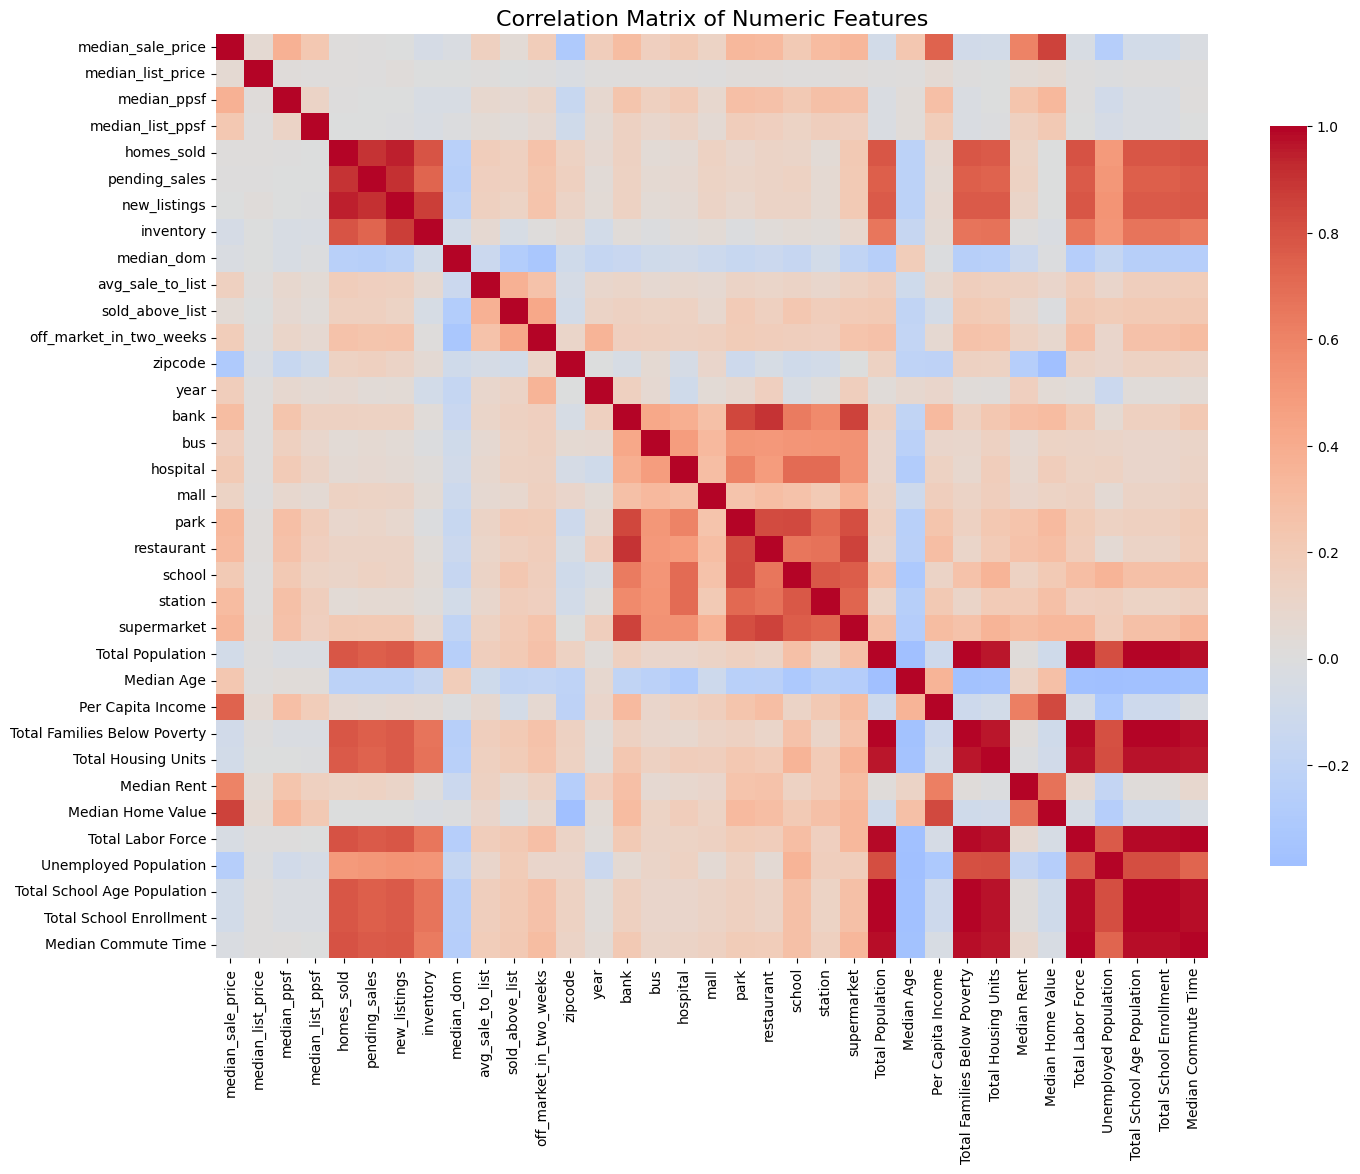

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features (exclude the target 'price')
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=["price"], errors="ignore")

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display full matrix as heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm", 
    center=0, 
    annot=False,   # set to True if you want numbers on cells
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()


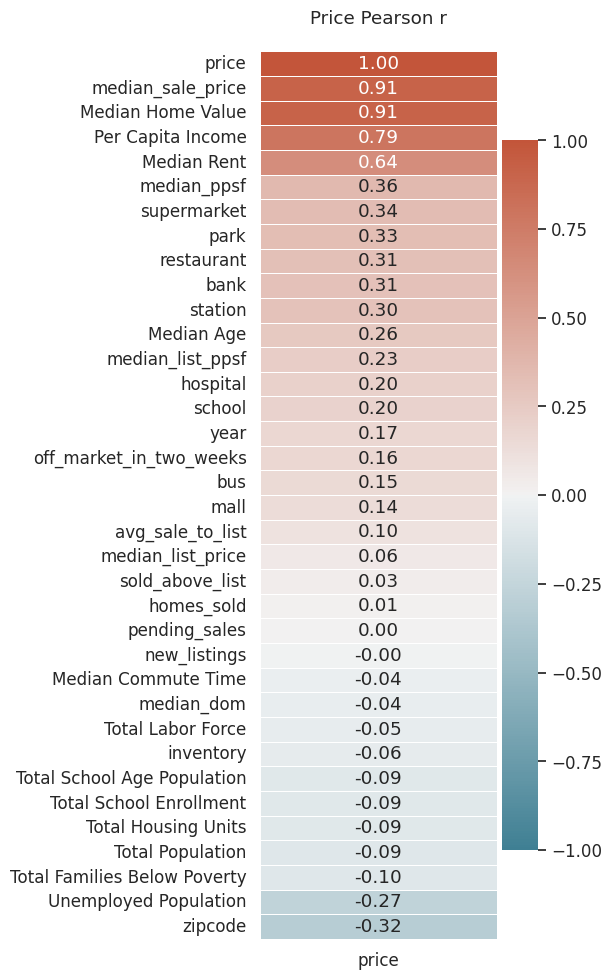

: 

In [ ]:
# Compute correlations with price
num_cols = df.select_dtypes("number").columns
corr_vec  = df[num_cols].corr(method="pearson")["price"].sort_values(ascending=False)
sns.set_theme(style="white")     
sns.set(font_scale=1.1)          
plt.figure(figsize=(6,10))       
ax = sns.heatmap(
        corr_vec.to_frame(),     
        annot=True, fmt=".2f",
        vmin=-1, vmax=1,         
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        center=0,
        linewidths=.5, linecolor="white",
        cbar_kws={"shrink":0.8, "pad":0.02}
     )
ax.set_title("Price Pearson r", pad=20)
ax.set_ylabel("")                 
ax.set_xlabel("")
plt.tight_layout()
plt.show()